In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder



In [2]:
train= pd.read_csv('../data/train.csv', na_values="?")
test= pd.read_csv('../data/test.csv', na_values="?" )

In [3]:
#'workclass', 'education', 'marital-status', 'occupation',
 #      'relationship', 'race', 'sex', 'native-country'],
  #    dtype='object'

In [4]:
# from sklearn.preprocessing import LabelEncoder
# temp =train.columns[train.dtypes=='object']

# le = LabelEncoder()
# for i in temp:
#     le.fit(train[i])
#     train[i] =le.transform(train[i])

### 상관 관계 분석
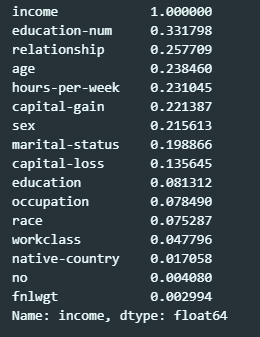

#### education-num || education

In [5]:
# 값 확인
train['education-num'].unique()

array([ 7, 10, 13, 11,  5,  9, 14,  3, 15,  8,  6, 12, 16,  4,  2,  1],
      dtype=int64)

In [6]:
# 개수 확인
train['education-num'].value_counts()

9     9435
10    6558
13    4848
14    1587
11    1230
7     1057
12     980
6      816
4      574
15     500
5      430
8      415
16     347
3      334
2      148
1       46
Name: education-num, dtype: int64

In [7]:
# education 확인
train['education'].unique()

array([' 11th', ' Some-college', ' Bachelors', ' Assoc-voc', ' 9th',
       ' HS-grad', ' Masters', ' 5th-6th', ' Prof-school', ' 12th',
       ' 10th', ' Assoc-acdm', ' Doctorate', ' 7th-8th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [8]:
train['education'].value_counts()

# HS-grad         9435 : 고졸
# Some-college    6558 : 대학
# Bachelors       4848 : 학사
# Masters         1587 : 석사
# Assoc-voc       1230 : 
# 11th            1057 : 
# Assoc-acdm       980 : 
# 10th             816 : 
# 7th-8th          574 : 
# Prof-school      500 : 
# 9th              430 : 
# 12th             415 : 
# Doctorate        347 : 박사
# 5th-6th          334 : 
# 1st-4th          148 : 
# Preschool         46 : 

 HS-grad         9435
 Some-college    6558
 Bachelors       4848
 Masters         1587
 Assoc-voc       1230
 11th            1057
 Assoc-acdm       980
 10th             816
 7th-8th          574
 Prof-school      500
 9th              430
 12th             415
 Doctorate        347
 5th-6th          334
 1st-4th          148
 Preschool         46
Name: education, dtype: int64

In [9]:
edu_dict={
    " Preschool":"level1",
    " 1st-4th":"level1",
    " 5th-6th":"level1",
    " 7th-8th":"level1",
    " 9th":"level1",
    " 10th":"level2",
    " 11th":"level2",
    " 12th":"level2",
    " HS-grad":"level2",
    " Some-collge":"level3",
    " Bachelors":"level3",
    " Assoc-voc":"level3",
    " Assoc-acdm":"level3",
    " Masters":"level4",
    " Prof-school":"level4",
    " Doctorate":"level4",
}

In [10]:
edu_title=[
    " Preschool",
    " 1st-4th",
    " 5th-6th",
    " 7th-8th",
    " 9th",
    " 10th",
    " 11th",
    " 12th",
    " HS-grad",
    " Some-college",
    " Bachelors",
    " Assoc-voc",
    " Assoc-acdm",
    " Masters",
    " Prof-school",
    " Doctorate",
]

cvt_title = ['level1']*5+['level2']*4 +['level3']*4+['level4']*3

In [11]:
title_dict = dict(zip(edu_title, cvt_title))
train['education'] = train['education'].map(title_dict)

In [12]:
title_dict = dict(zip(edu_title, cvt_title))
test['education'] = test['education'].map(title_dict)

In [13]:
train['education'].value_counts()

level3    13616
level2    11723
level4     2434
level1     1532
Name: education, dtype: int64

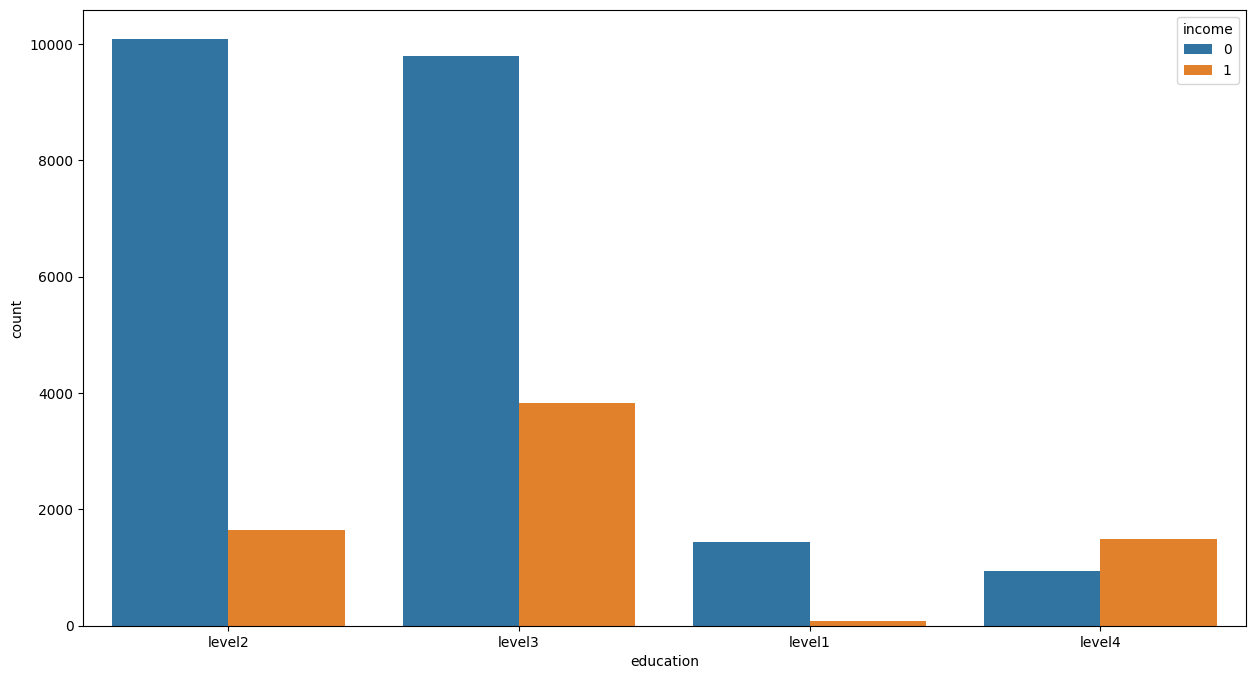

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(train, x='education', hue='income')
plt.show()

In [15]:
train.drop('education-num', axis=1, inplace=True)
test.drop('education-num', axis=1, inplace=True)

In [16]:
train.to_csv("../data/edu_train_csv",index=False)
test.to_csv("../data/edu_test_csv",index=False)


In [17]:
#train.columns

In [18]:
#train[train['education-num']==9]